In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('final_2.csv')
df

C:\Users\seok\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,발생일시,지점,발생해역,발생유형,발생원인,기상상태,구조,부상,사망,실종,...,GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,2011-12-31 06:40,여수,영해,전복,운항부주의,양호,5.0,0.0,0.0,0.0,...,7.5,1027.9,51.0,4.8,15.3,1.1,0.7,0.4,6.4,355.0
1,2011-12-30 21:15,부산,항계내,화재,정비불량,양호,67.0,0.0,0.0,0.0,...,4.9,1028.6,58.0,8.6,16.4,2.2,1.4,0.7,6.4,285.0
2,2011-12-30 11:07,속초,영해,침수,정비불량,양호,1.0,0.0,0.0,0.0,...,9.6,1030.0,51.0,5.1,14.4,2.8,2.0,1.0,4.3,359.0
3,2011-12-29 14:15,목포,영해,추진기장애,운항부주의,양호,46.0,0.0,0.0,0.0,...,11.8,1028.4,64.0,4.7,9.0,2.5,1.4,0.7,6.4,214.0
4,2011-12-29 13:35,목포,영해,추진기장애,관리소홀,양호,1.0,0.0,0.0,0.0,...,11.5,1029.4,63.0,4.8,8.9,3.1,1.7,0.8,6.4,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17437,2021-01-01 17:58,울산,항계 내,기관손상,정비불량,양호,7.0,0.0,0.0,0.0,...,9.7,1023.9,56.0,5.0,16.0,2.3,1.3,0.9,9.1,58.0
17438,2021-01-01 15:31,울산,영해,기관손상,정비불량,양호,1.0,0.0,0.0,0.0,...,8.9,1023.9,55.0,4.4,16.0,3.0,1.7,1.2,8.0,44.0
17439,2021-01-01 12:01,통영,협수로,기관손상,정비불량,양호,15.0,0.0,0.0,0.0,...,10.3,1027.0,62.0,3.0,11.9,1.3,0.9,0.6,3.4,305.0
17440,2021-01-01 11:45,여수,영해,충돌,운항부주의,양호,12.0,0.0,0.0,0.0,...,9.6,1027.9,59.0,4.5,14.5,1.7,0.9,0.7,7.1,112.0


간단한 EDA를 하기 위해 info 출력

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   발생일시         17442 non-null  object 
 1   지점           17442 non-null  object 
 2   발생해역         17442 non-null  object 
 3   발생유형         17442 non-null  object 
 4   발생원인         17442 non-null  object 
 5   기상상태         17442 non-null  object 
 6   구조           17434 non-null  float64
 7   부상           17434 non-null  float64
 8   사망           17434 non-null  float64
 9   실종           17434 non-null  float64
 10  위도           17442 non-null  object 
 11  경도           17442 non-null  object 
 12  선 종          17434 non-null  object 
 13  톤수           17434 non-null  float64
 14  월별           17442 non-null  int64  
 15  시간대별         17442 non-null  int64  
 16  발생인원         17434 non-null  float64
 17  사고규모         17317 non-null  float64
 18  key          17442 non-null  object 
 19  일시  

## 필요없다고 판단되어지는 column 삭제
- 톤수, 발생인원 --> 발생인원/톤수 = 사고규모로 되체됨
- 발생인원 = 구조 + 부상 + 사망 + 실종 이므로 삭제
- 발생일시에서 월별, 시간대별 뽑았으므로 삭제
- key : mapping할 때 필요한 거였으므로 삭제
- 풍향 : 영향이 적을 것이라 생각되어 삭제
- 같은원리로 파향, 수온 삭제

In [5]:
df.drop(['발생일시', '구조', '부상', '사망', '실종', '톤수', '발생인원', 'key', '풍향(deg)'], axis=1, inplace=True)

In [6]:
df

,지점,발생해역,발생유형,발생원인,기상상태,위도,경도,선 종,월별,시간대별,...,GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,여수,영해,전복,운항부주의,양호,34,12,낚시어선,12,6,...,7.5,1027.9,51.0,4.8,15.3,1.1,0.7,0.4,6.4,355.0
1,부산,항계내,화재,정비불량,양호,35,12,어선,12,21,...,4.9,1028.6,58.0,8.6,16.4,2.2,1.4,0.7,6.4,285.0
2,속초,영해,침수,정비불량,양호,37,12,어선,12,11,...,9.6,1030.0,51.0,5.1,14.4,2.8,2.0,1.0,4.3,359.0
3,목포,영해,추진기장애,운항부주의,양호,34,12,여객선,12,14,...,11.8,1028.4,64.0,4.7,9.0,2.5,1.4,0.7,6.4,214.0
4,목포,영해,추진기장애,관리소홀,양호,35,12,기타,12,13,...,11.5,1029.4,63.0,4.8,8.9,3.1,1.7,0.8,6.4,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17437,울산,항계 내,기관손상,정비불량,양호,35,12,낚시어선,1,17,...,9.7,1023.9,56.0,5.0,16.0,2.3,1.3,0.9,9.1,58.0
17438,울산,영해,기관손상,정비불량,양호,35,12,어선,1,15,...,8.9,1023.9,55.0,4.4,16.0,3.0,1.7,1.2,8.0,44.0
17439,통영,협수로,기관손상,정비불량,양호,34,12,낚시어선,1,12,...,10.3,1027.0,62.0,3.0,11.9,1.3,0.9,0.6,3.4,305.0
17440,여수,영해,충돌,운항부주의,양호,34,12,어선,1,11,...,9.6,1027.9,59.0,4.5,14.5,1.7,0.9,0.7,7.1,112.0


In [8]:
df.drop(['수온(°C)', '파향(deg)'], axis=1, inplace=True)

In [9]:
df

,지점,발생해역,발생유형,발생원인,기상상태,위도,경도,선 종,월별,시간대별,...,일시,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)
0,여수,영해,전복,운항부주의,양호,34,12,낚시어선,12,6,...,2011-12-31 6:00,4.9,7.5,1027.9,51.0,4.8,1.1,0.7,0.4,6.4
1,부산,항계내,화재,정비불량,양호,35,12,어선,12,21,...,2011-12-30 21:00,2.7,4.9,1028.6,58.0,8.6,2.2,1.4,0.7,6.4
2,속초,영해,침수,정비불량,양호,37,12,어선,12,11,...,2011-12-30 11:00,6.7,9.6,1030.0,51.0,5.1,2.8,2.0,1.0,4.3
3,목포,영해,추진기장애,운항부주의,양호,34,12,여객선,12,14,...,2011-12-29 14:00,8.8,11.8,1028.4,64.0,4.7,2.5,1.4,0.7,6.4
4,목포,영해,추진기장애,관리소홀,양호,35,12,기타,12,13,...,2011-12-29 13:00,8.8,11.5,1029.4,63.0,4.8,3.1,1.7,0.8,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17437,울산,항계 내,기관손상,정비불량,양호,35,12,낚시어선,1,17,...,2021-01-01 17:00,7.0,9.7,1023.9,56.0,5.0,2.3,1.3,0.9,9.1
17438,울산,영해,기관손상,정비불량,양호,35,12,어선,1,15,...,2021-01-01 15:00,6.3,8.9,1023.9,55.0,4.4,3.0,1.7,1.2,8.0
17439,통영,협수로,기관손상,정비불량,양호,34,12,낚시어선,1,12,...,2021-01-01 12:00,8.0,10.3,1027.0,62.0,3.0,1.3,0.9,0.6,3.4
17440,여수,영해,충돌,운항부주의,양호,34,12,어선,1,11,...,2021-01-01 11:00,6.5,9.6,1027.9,59.0,4.5,1.7,0.9,0.7,7.1


In [10]:
df.to_csv('project_data.csv',index=False, encoding='utf-8-sig')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지점           17442 non-null  object 
 1   발생해역         17442 non-null  object 
 2   발생유형         17442 non-null  object 
 3   발생원인         17442 non-null  object 
 4   기상상태         17442 non-null  object 
 5   위도           17442 non-null  object 
 6   경도           17442 non-null  object 
 7   선 종          17434 non-null  object 
 8   월별           17442 non-null  int64  
 9   시간대별         17442 non-null  int64  
 10  사고규모         17317 non-null  float64
 11  일시           17442 non-null  object 
 12  풍속(m/s)      17442 non-null  float64
 13  GUST풍속(m/s)  17442 non-null  float64
 14  현지기압(hPa)    17442 non-null  float64
 15  습도(%)        17442 non-null  float64
 16  기온(°C)       17442 non-null  float64
 17  최대파고(m)      17442 non-null  float64
 18  유의파고(m)      17442 non-null  float64
 19  평균파고

### describe로 요약 통계량 확인

In [14]:
df.describe()

,월별,시간대별,사고규모,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)
count,17442.000000,17442.000000,1.731700e+04,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.00000,17442.000000
mean,6.955682,11.704334,inf,5.479828,7.246312,1015.657236,75.483145,16.488848,1.522550,0.931698,0.64155,5.484656
std,3.286771,5.505220,NaN,3.334997,4.480445,7.972783,15.862227,7.111013,1.261812,0.787624,0.54752,2.041561
min,1.000000,0.000000,0.000000e+00,0.000000,0.000000,957.100000,0.000000,-33.942124,0.000000,0.000000,0.00000,1.900000
25%,4.000000,8.000000,8.633094e-02,3.000000,4.000000,1009.800000,64.000000,11.125000,0.800000,0.500000,0.30000,4.000000
50%,7.000000,12.000000,4.065041e-01,5.000000,6.500000,1015.500000,78.000000,17.200000,1.200000,0.700000,0.50000,5.300000
75%,10.000000,16.000000,1.125896e+00,7.400000,9.600000,1021.700000,89.000000,22.300000,1.900000,1.200000,0.80000,6.500000
max,12.000000,23.000000,inf,26.800000,84.900000,1041.612273,100.000000,34.800000,15.300000,10.900000,7.80000,24.800000


In [15]:
df.describe(include='all')

,지점,발생해역,발생유형,발생원인,기상상태,위도,경도,선 종,월별,시간대별,...,일시,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)
count,17442,17442,17442,17442,17442,17442,17442,17434,17442.000000,17442.000000,...,17442,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.00000,17442.000000
unique,15,7,30,13,11,35,15,15,NaN,NaN,...,14308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,목포,영해,기관손상,정비불량,양호,34,12,어선,NaN,NaN,...,2021-03-23 3:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2498,9290,4622,6909,15499,6182,15676,9688,NaN,NaN,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.955682,11.704334,...,NaN,5.479828,7.246312,1015.657236,75.483145,16.488848,1.522550,0.931698,0.64155,5.484656
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.286771,5.505220,...,NaN,3.334997,4.480445,7.972783,15.862227,7.111013,1.261812,0.787624,0.54752,2.041561
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,...,NaN,0.000000,0.000000,957.100000,0.000000,-33.942124,0.000000,0.000000,0.00000,1.900000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,8.000000,...,NaN,3.000000,4.000000,1009.800000,64.000000,11.125000,0.800000,0.500000,0.30000,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,12.000000,...,NaN,5.000000,6.500000,1015.500000,78.000000,17.200000,1.200000,0.700000,0.50000,5.300000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,16.000000,...,NaN,7.400000,9.600000,1021.700000,89.000000,22.300000,1.900000,1.200000,0.80000,6.500000


사고규모에서 inf를 발견하여 이를 없애기로 결정!

In [22]:
import numpy as np

In [24]:
data = df[df['사고규모'] == np.inf]
data

,지점,발생해역,발생유형,발생원인,기상상태,위도,경도,선 종,월별,시간대별,...,일시,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)
47,부산,영해,추진기장애,기타,양호,35,12,기타,11,14,...,2011-11-28 14:00,3.4,4.1,1020.1,82.0,18.0,0.90,0.6,0.3,4.6
55,부산,영해,기관고장,정비불량,양호,35,12,모터보트,11,18,...,2011-11-20 18:00,6.5,9.1,1024.7,27.0,9.9,2.00,1.2,0.6,8.0
65,부산,영해,표류,연료고갈,양호,35,12,모터보트,11,11,...,2011-11-12 11:00,6.5,7.8,1016.6,67.0,16.8,0.95,0.6,0.3,3.0
134,목포,항계내,기관고장,관리소홀,양호,34,12,모터보트,10,12,...,2011-10-01 12:00,8.7,11.9,1023.0,61.0,16.5,2.10,1.3,0.6,7.1
137,부산,항계내,추진기장애,기타,양호,35,12,요트,9,14,...,2011-09-30 14:00,8.3,10.7,1014.3,47.0,21.6,1.80,1.0,0.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17024,포항,항계 내,부유물감김,운항부주의,양호,36,12,기타,3,15,...,2021-03-13 15:00,10.8,13.8,1018.8,70.0,11.2,4.50,2.4,1.7,7.1
17038,인천,항계 내,작업 중 인명사상,안전부주의,양호,37,12,예부선,3,9,...,2021-03-12 9:00,3.7,4.7,1022.5,87.0,6.5,0.40,0.2,0.1,2.9
17076,태안,영해,운항저해,기상악화,양호,36,12,모터보트,3,10,...,2021-03-06 10:00,11.5,13.7,1029.0,80.0,4.0,3.50,2.5,1.6,7.9
17270,울산,영해,전복,운항부주의,양호,35,12,고무보트,1,11,...,2021-01-31 11:00,2.0,3.7,1031.2,40.0,9.1,2.40,1.5,1.1,10.7


In [28]:
df.corr() # feature간 상관관계 확인

,월별,시간대별,사고규모,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)
월별,1.000000,0.004625,0.053060,-0.010942,-0.005396,0.005380,-0.028289,0.361005,0.001031,0.001680,0.006254,-0.001547
시간대별,0.004625,1.000000,0.007858,-0.020856,-0.016767,-0.022481,-0.047181,0.057385,-0.031516,-0.030452,-0.031630,0.011364
사고규모,0.053060,0.007858,1.000000,-0.054360,-0.057332,0.001641,0.007666,0.056586,-0.058905,-0.058374,-0.057625,-0.020913
풍속(m/s),-0.010942,-0.020856,-0.054360,1.000000,0.934514,-0.017235,-0.141840,-0.183027,0.698763,0.705862,0.700031,0.090699
GUST풍속(m/s),-0.005396,-0.016767,-0.057332,0.934514,1.000000,0.020143,-0.188706,-0.219378,0.695186,0.702372,0.696533,0.107539
현지기압(hPa),0.005380,-0.022481,0.001641,-0.017235,0.020143,1.000000,-0.596977,-0.651635,-0.117266,-0.120133,-0.120214,-0.126386
습도(%),-0.028289,-0.047181,0.007666,-0.141840,-0.188706,-0.596977,1.000000,0.497022,-0.064341,-0.065414,-0.060640,0.011487
기온(°C),0.361005,0.057385,0.056586,-0.183027,-0.219378,-0.651635,0.497022,1.000000,-0.107271,-0.109075,-0.100264,0.065901
최대파고(m),0.001031,-0.031516,-0.058905,0.698763,0.695186,-0.117266,-0.064341,-0.107271,1.000000,0.978964,0.971513,0.419472
유의파고(m),0.001680,-0.030452,-0.058374,0.705862,0.702372,-0.120133,-0.065414,-0.109075,0.978964,1.000000,0.989177,0.429987


In [31]:
df.drop(['위도', '경도'], axis=1, inplace=True) # 위도, 경도가 아무래도 한국이다보니 거의 일정  또한, 지점으로 대체가능함
df

,지점,발생해역,발생유형,발생원인,기상상태,선 종,월별,시간대별,사고규모,일시,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)
0,여수,영해,전복,운항부주의,양호,낚시어선,12,6,2.659574,2011-12-31 6:00,4.9,7.5,1027.9,51.0,4.8,1.1,0.7,0.4,6.4
1,부산,항계내,화재,정비불량,양호,어선,12,21,0.030538,2011-12-30 21:00,2.7,4.9,1028.6,58.0,8.6,2.2,1.4,0.7,6.4
2,속초,영해,침수,정비불량,양호,어선,12,11,0.333333,2011-12-30 11:00,6.7,9.6,1030.0,51.0,5.1,2.8,2.0,1.0,4.3
3,목포,영해,추진기장애,운항부주의,양호,여객선,12,14,0.186235,2011-12-29 14:00,8.8,11.8,1028.4,64.0,4.7,2.5,1.4,0.7,6.4
4,목포,영해,추진기장애,관리소홀,양호,기타,12,13,0.238095,2011-12-29 13:00,8.8,11.5,1029.4,63.0,4.8,3.1,1.7,0.8,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17437,울산,항계 내,기관손상,정비불량,양호,낚시어선,1,17,2.333333,2021-01-01 17:00,7.0,9.7,1023.9,56.0,5.0,2.3,1.3,0.9,9.1
17438,울산,영해,기관손상,정비불량,양호,어선,1,15,0.518135,2021-01-01 15:00,6.3,8.9,1023.9,55.0,4.4,3.0,1.7,1.2,8.0
17439,통영,협수로,기관손상,정비불량,양호,낚시어선,1,12,2.311248,2021-01-01 12:00,8.0,10.3,1027.0,62.0,3.0,1.3,0.9,0.6,3.4
17440,여수,영해,충돌,운항부주의,양호,어선,1,11,0.500000,2021-01-01 11:00,6.5,9.6,1027.9,59.0,4.5,1.7,0.9,0.7,7.1


In [32]:
data = df[df['사고규모'] != np.inf] # 사교규모에서 inf인거 삭제
data

,지점,발생해역,발생유형,발생원인,기상상태,선 종,월별,시간대별,사고규모,일시,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)
0,여수,영해,전복,운항부주의,양호,낚시어선,12,6,2.659574,2011-12-31 6:00,4.9,7.5,1027.9,51.0,4.8,1.1,0.7,0.4,6.4
1,부산,항계내,화재,정비불량,양호,어선,12,21,0.030538,2011-12-30 21:00,2.7,4.9,1028.6,58.0,8.6,2.2,1.4,0.7,6.4
2,속초,영해,침수,정비불량,양호,어선,12,11,0.333333,2011-12-30 11:00,6.7,9.6,1030.0,51.0,5.1,2.8,2.0,1.0,4.3
3,목포,영해,추진기장애,운항부주의,양호,여객선,12,14,0.186235,2011-12-29 14:00,8.8,11.8,1028.4,64.0,4.7,2.5,1.4,0.7,6.4
4,목포,영해,추진기장애,관리소홀,양호,기타,12,13,0.238095,2011-12-29 13:00,8.8,11.5,1029.4,63.0,4.8,3.1,1.7,0.8,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17437,울산,항계 내,기관손상,정비불량,양호,낚시어선,1,17,2.333333,2021-01-01 17:00,7.0,9.7,1023.9,56.0,5.0,2.3,1.3,0.9,9.1
17438,울산,영해,기관손상,정비불량,양호,어선,1,15,0.518135,2021-01-01 15:00,6.3,8.9,1023.9,55.0,4.4,3.0,1.7,1.2,8.0
17439,통영,협수로,기관손상,정비불량,양호,낚시어선,1,12,2.311248,2021-01-01 12:00,8.0,10.3,1027.0,62.0,3.0,1.3,0.9,0.6,3.4
17440,여수,영해,충돌,운항부주의,양호,어선,1,11,0.500000,2021-01-01 11:00,6.5,9.6,1027.9,59.0,4.5,1.7,0.9,0.7,7.1


## Target정하기
- 처음에는 발생유형을 target으로 정함.
- 비슷한 값들은 묶고서 classification을 진행하기로 함.

In [33]:
df['발생유형'].value_counts()

기관손상         4622
충돌           1490
침수           1333
추진기손상        1180
부유물감김        1152
운항저해         1021
안전저해          984
화재            803
키손상           546
좌초            533
좌초/좌주         483
전복            443
인명사상          404
기관고장          361
기타            352
접촉            350
해양오염          295
표류            240
작업 중 인명사상     233
침몰            204
추진기장애         133
조난             98
방향상실           67
타기고장           32
좌주             24
속구손상           23
폭발             18
시설물손상          14
실종(인명)          3
실종(선박)          1
Name: 발생유형, dtype: int64

In [34]:
# '좌초','좌주' -> '좌초/좌주' |  데이터에서 1%미만에 해당하는 값은 특별한 case로 판단하여 기타로 묶음
data = data.replace('좌초','좌초/좌주')
data = data.replace('좌주', '좌초/좌주')
data = data.replace(['추진기장애', '조난', '방향상실', '타기고장', '속구손상', '폭발', '시설물손상', '실종(인명)', '실종(선박)'],'기타')
data

,지점,발생해역,발생유형,발생원인,기상상태,선 종,월별,시간대별,사고규모,일시,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)
0,여수,영해,전복,운항부주의,양호,낚시어선,12,6,2.659574,2011-12-31 6:00,4.9,7.5,1027.9,51.0,4.8,1.1,0.7,0.4,6.4
1,부산,항계내,화재,정비불량,양호,어선,12,21,0.030538,2011-12-30 21:00,2.7,4.9,1028.6,58.0,8.6,2.2,1.4,0.7,6.4
2,속초,영해,침수,정비불량,양호,어선,12,11,0.333333,2011-12-30 11:00,6.7,9.6,1030.0,51.0,5.1,2.8,2.0,1.0,4.3
3,목포,영해,기타,운항부주의,양호,여객선,12,14,0.186235,2011-12-29 14:00,8.8,11.8,1028.4,64.0,4.7,2.5,1.4,0.7,6.4
4,목포,영해,기타,관리소홀,양호,기타,12,13,0.238095,2011-12-29 13:00,8.8,11.5,1029.4,63.0,4.8,3.1,1.7,0.8,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17437,울산,항계 내,기관손상,정비불량,양호,낚시어선,1,17,2.333333,2021-01-01 17:00,7.0,9.7,1023.9,56.0,5.0,2.3,1.3,0.9,9.1
17438,울산,영해,기관손상,정비불량,양호,어선,1,15,0.518135,2021-01-01 15:00,6.3,8.9,1023.9,55.0,4.4,3.0,1.7,1.2,8.0
17439,통영,협수로,기관손상,정비불량,양호,낚시어선,1,12,2.311248,2021-01-01 12:00,8.0,10.3,1027.0,62.0,3.0,1.3,0.9,0.6,3.4
17440,여수,영해,충돌,운항부주의,양호,어선,1,11,0.500000,2021-01-01 11:00,6.5,9.6,1027.9,59.0,4.5,1.7,0.9,0.7,7.1


In [36]:
data['발생유형'].value_counts()

기관손상         4513
충돌           1484
침수           1315
부유물감김        1144
추진기손상        1060
좌초/좌주        1027
안전저해          967
운항저해          938
화재            801
기타            711
키손상           541
전복            424
인명사상          398
접촉            349
기관고장          346
해양오염          295
작업 중 인명사상     229
표류            227
침몰            203
Name: 발생유형, dtype: int64

In [37]:
data.to_csv('project_data2.csv',index=False, encoding='utf-8-sig')

In [38]:
data

,지점,발생해역,발생유형,발생원인,기상상태,선 종,월별,시간대별,사고규모,일시,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec)
0,여수,영해,전복,운항부주의,양호,낚시어선,12,6,2.659574,2011-12-31 6:00,4.9,7.5,1027.9,51.0,4.8,1.1,0.7,0.4,6.4
1,부산,항계내,화재,정비불량,양호,어선,12,21,0.030538,2011-12-30 21:00,2.7,4.9,1028.6,58.0,8.6,2.2,1.4,0.7,6.4
2,속초,영해,침수,정비불량,양호,어선,12,11,0.333333,2011-12-30 11:00,6.7,9.6,1030.0,51.0,5.1,2.8,2.0,1.0,4.3
3,목포,영해,기타,운항부주의,양호,여객선,12,14,0.186235,2011-12-29 14:00,8.8,11.8,1028.4,64.0,4.7,2.5,1.4,0.7,6.4
4,목포,영해,기타,관리소홀,양호,기타,12,13,0.238095,2011-12-29 13:00,8.8,11.5,1029.4,63.0,4.8,3.1,1.7,0.8,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17437,울산,항계 내,기관손상,정비불량,양호,낚시어선,1,17,2.333333,2021-01-01 17:00,7.0,9.7,1023.9,56.0,5.0,2.3,1.3,0.9,9.1
17438,울산,영해,기관손상,정비불량,양호,어선,1,15,0.518135,2021-01-01 15:00,6.3,8.9,1023.9,55.0,4.4,3.0,1.7,1.2,8.0
17439,통영,협수로,기관손상,정비불량,양호,낚시어선,1,12,2.311248,2021-01-01 12:00,8.0,10.3,1027.0,62.0,3.0,1.3,0.9,0.6,3.4
17440,여수,영해,충돌,운항부주의,양호,어선,1,11,0.500000,2021-01-01 11:00,6.5,9.6,1027.9,59.0,4.5,1.7,0.9,0.7,7.1


## 시각화 시도
- corr을 시각화해봄
- 다른 컬럼은 상관없으나 풍속과 GUST풍속, 유의파고, 최대파고, 평균파고는 당연하게도 상관성이 높음을 확인

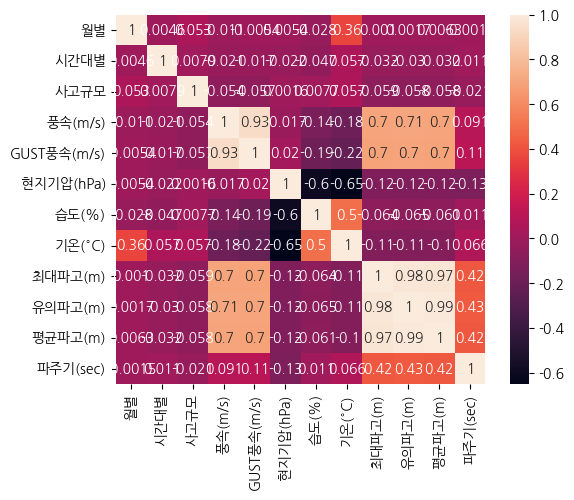

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data=df.corr(), square=True, annot=True, cbar=True)
plt.show()

### displot을 활용하여 연속형변수를 기준으로 하여 발생유형이 얼마나 다른지를 확인

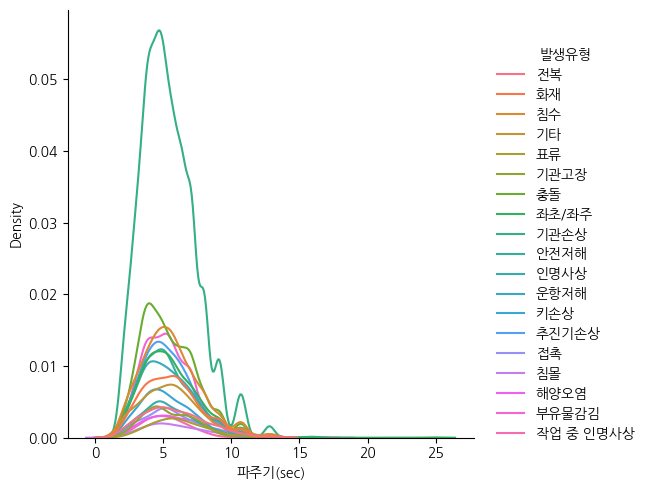

In [42]:
sns.displot(x='파주기(sec)', hue = '발생유형', kind='kde', data=data)

In [43]:
data.columns

Index(['지점', '발생해역', '발생유형', '발생원인', '기상상태', '선 종', '월별', '시간대별', '사고규모', '일시',
       '풍속(m/s)', 'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '최대파고(m)',
       '유의파고(m)', '평균파고(m)', '파주기(sec)'],
      dtype='object')

## 픙속과 GUST풍속은 상관성이 높지만 데이터의 분포에 차이가 있음을 확인 --> 둘다 사용해보기로 결정

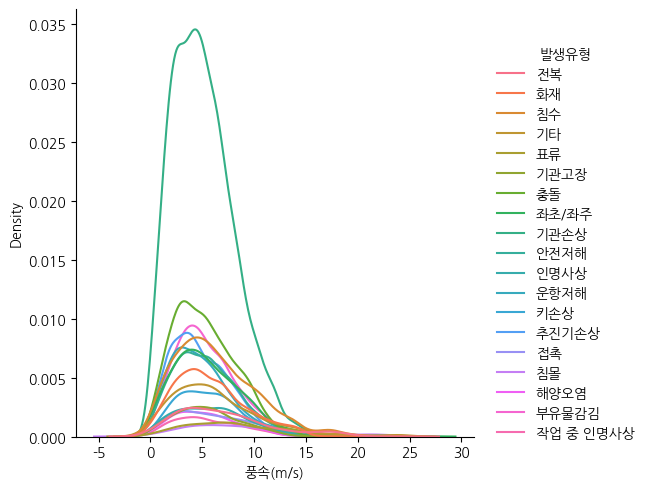

In [44]:
sns.displot(x='풍속(m/s)', hue = '발생유형', kind='kde', data=data)

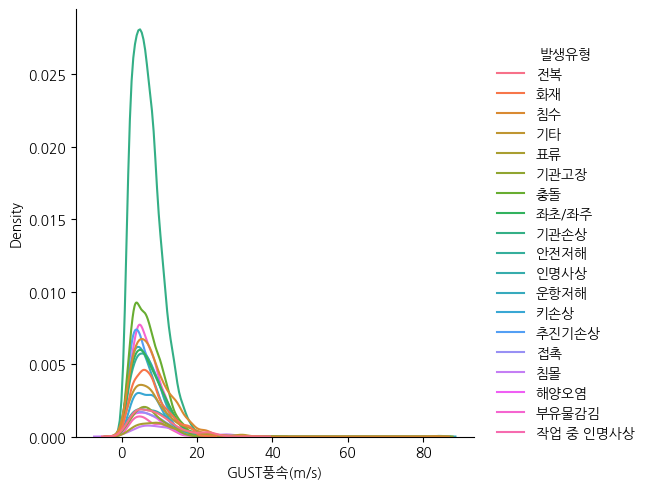

In [50]:
sns.displot(x='GUST풍속(m/s)', hue = '발생유형', kind='kde', data=data)

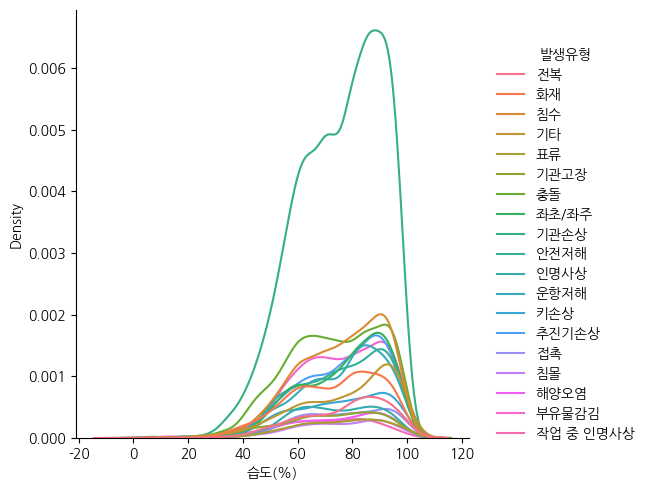

In [45]:
sns.displot(x='습도(%)', hue = '발생유형', kind='kde', data=data)

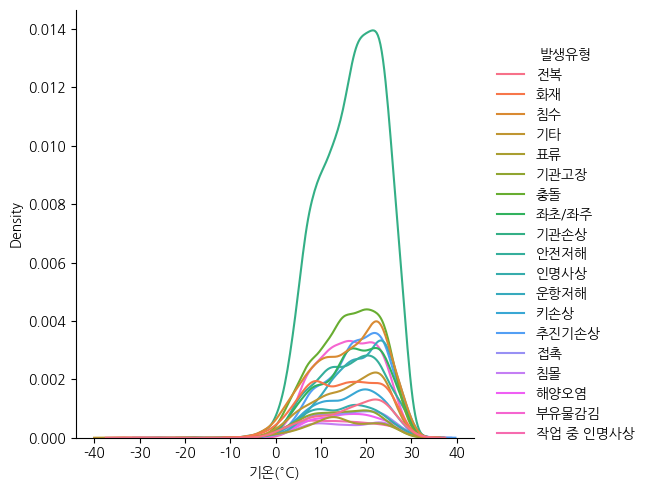

In [46]:
sns.displot(x='기온(°C)', hue = '발생유형', kind='kde', data=data)

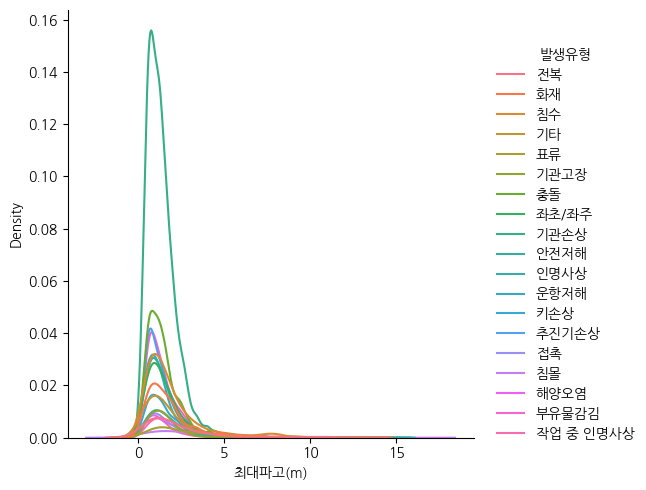

In [47]:
sns.displot(x='최대파고(m)', hue = '발생유형', kind='kde', data=data)

## 풍속과 달리 파고끼리는 분포도 비슷하고 상관성이 너무 뚜렷하여 삭제

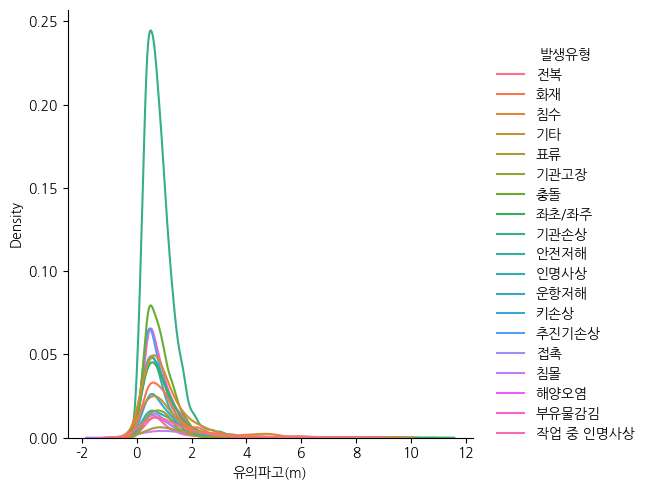

In [48]:
sns.displot(x='유의파고(m)', hue = '발생유형', kind='kde', data=data)

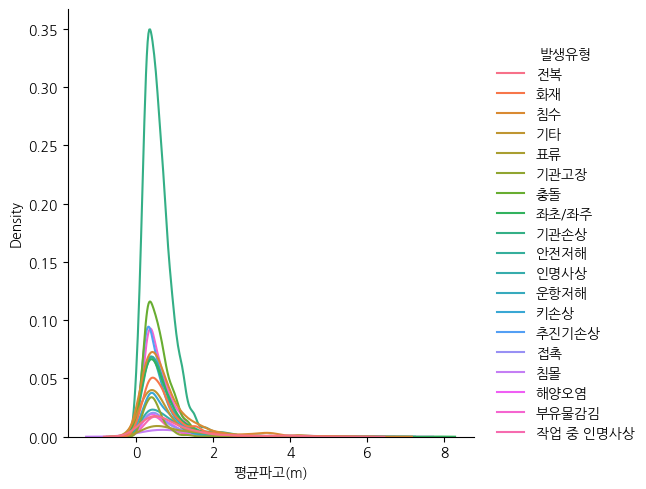

In [49]:
sns.displot(x='평균파고(m)', hue = '발생유형', kind='kde', data=data)

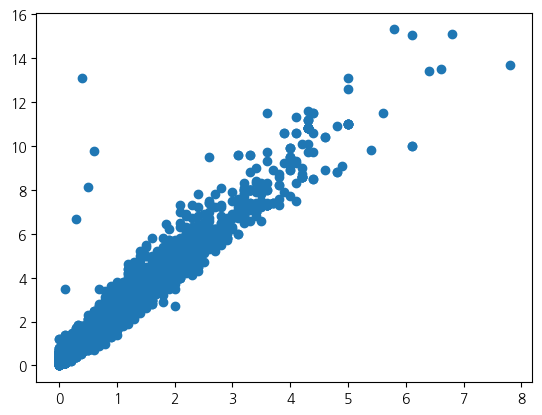

In [51]:
plt.scatter(data['평균파고(m)'], data['최대파고(m)'])

In [52]:
data.drop(['유의파고(m)','평균파고(m)'], axis=1, inplace=True)
data

,지점,발생해역,발생유형,발생원인,기상상태,선 종,월별,시간대별,사고규모,일시,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),파주기(sec)
0,여수,영해,전복,운항부주의,양호,낚시어선,12,6,2.659574,2011-12-31 6:00,4.9,7.5,1027.9,51.0,4.8,1.1,6.4
1,부산,항계내,화재,정비불량,양호,어선,12,21,0.030538,2011-12-30 21:00,2.7,4.9,1028.6,58.0,8.6,2.2,6.4
2,속초,영해,침수,정비불량,양호,어선,12,11,0.333333,2011-12-30 11:00,6.7,9.6,1030.0,51.0,5.1,2.8,4.3
3,목포,영해,기타,운항부주의,양호,여객선,12,14,0.186235,2011-12-29 14:00,8.8,11.8,1028.4,64.0,4.7,2.5,6.4
4,목포,영해,기타,관리소홀,양호,기타,12,13,0.238095,2011-12-29 13:00,8.8,11.5,1029.4,63.0,4.8,3.1,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17437,울산,항계 내,기관손상,정비불량,양호,낚시어선,1,17,2.333333,2021-01-01 17:00,7.0,9.7,1023.9,56.0,5.0,2.3,9.1
17438,울산,영해,기관손상,정비불량,양호,어선,1,15,0.518135,2021-01-01 15:00,6.3,8.9,1023.9,55.0,4.4,3.0,8.0
17439,통영,협수로,기관손상,정비불량,양호,낚시어선,1,12,2.311248,2021-01-01 12:00,8.0,10.3,1027.0,62.0,3.0,1.3,3.4
17440,여수,영해,충돌,운항부주의,양호,어선,1,11,0.500000,2021-01-01 11:00,6.5,9.6,1027.9,59.0,4.5,1.7,7.1


## 추가적으로 범주형 별로 발생유형이 어떻게 다른지 보고자 countplot을 이용하여 추이 판단
- 밑에 제시된 그래프에서 유독 분포가 다름을 확인

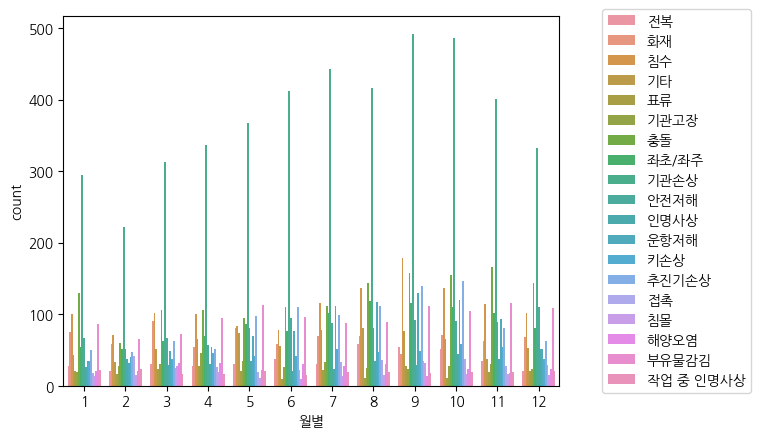

In [63]:
sns.countplot(data = data, x = "월별", hue = "발생유형")
plt.legend(loc='center right',bbox_to_anchor=(1.4, 0.5))

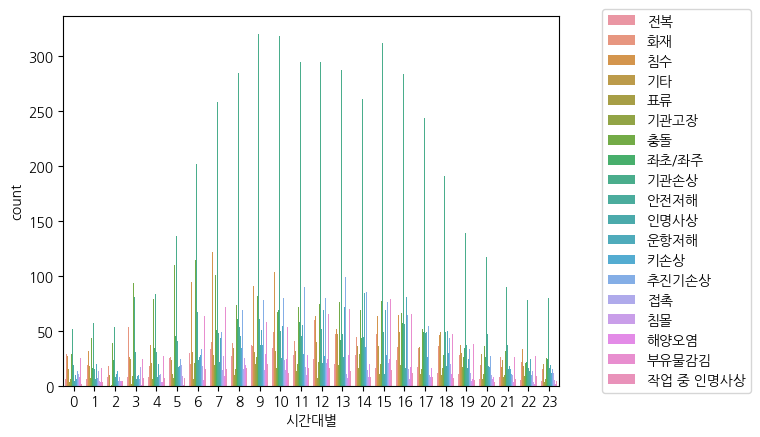

In [64]:
sns.countplot(data = data, x = "시간대별", hue = "발생유형")
plt.legend(loc='center right',bbox_to_anchor=(1.4, 0.5))

In [65]:
data.to_csv('project_data3.csv',index=False, encoding='utf-8-sig')

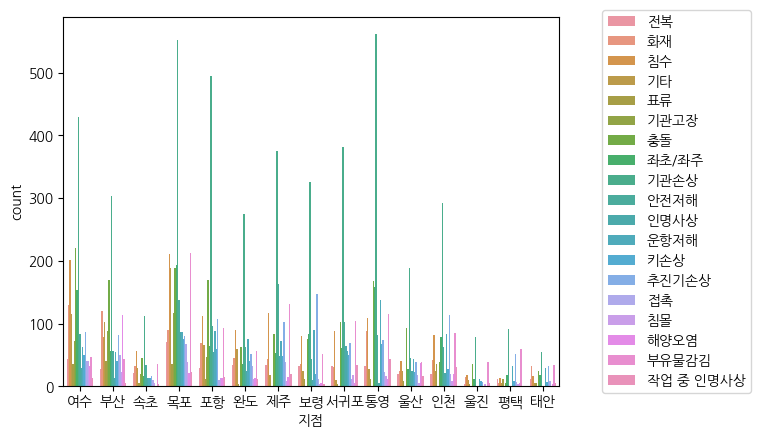

In [66]:
sns.countplot(data = data, x = "지점", hue = "발생유형")
plt.legend(loc='center right',bbox_to_anchor=(1.4, 0.5))